## Problem Statement


To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.


## Features Description:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



## Getting Data

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('cardio_train.csv',';')

In [3]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


### Data Exploration

In [4]:
train.drop_duplicates(keep='first', inplace=True)
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        69301 non-null  int64  
 1   id           69301 non-null  int64  
 2   age          69301 non-null  int64  
 3   gender       69301 non-null  int64  
 4   height       69301 non-null  int64  
 5   weight       69301 non-null  float64
 6   ap_hi        69301 non-null  int64  
 7   ap_lo        69301 non-null  int64  
 8   cholesterol  69301 non-null  int64  
 9   gluc         69301 non-null  int64  
 10  smoke        69301 non-null  int64  
 11  alco         69301 non-null  int64  
 12  active       69301 non-null  int64  
 13  cardio       69301 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.4 MB


In [6]:
train.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
train.shape

(69301, 14)

## DataPreprocessing 

In [8]:
train.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

From here we can observe that there is no values present in this dataset.I think it's good sign towards model building .

In [9]:
#check unique values in every column
for i in train:
    print('unique values in ',i ,'is',train[i].nunique())

unique values in  index is 69301
unique values in  id is 69301
unique values in  age is 8069
unique values in  gender is 2
unique values in  height is 108
unique values in  weight is 285
unique values in  ap_hi is 153
unique values in  ap_lo is 157
unique values in  cholesterol is 3
unique values in  gluc is 3
unique values in  smoke is 2
unique values in  alco is 2
unique values in  active is 2
unique values in  cardio is 2


Now i'm going to drop Index and id columns from the dataset .

In [10]:
train.drop(['index','id'],axis=1,inplace=True)

In [11]:
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [12]:
train['weight'].min()

10.0

In [13]:
#converting age from days to years
y=[]
for i in train['age']:
    yr=round(i/365)
    y.append(yr)

In [14]:
train['age_yr']=y

In [15]:
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,62
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,40
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,60
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,40
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,64


Now i'm going to drop age column from the data set .

In [16]:
train.drop('age',axis=1,inplace=True)

In [17]:
train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,1,155,69.0,130,80,2,2,0,0,1,0,62
1,1,163,71.0,110,70,1,1,0,0,1,1,40
2,1,165,70.0,120,80,1,1,0,0,1,0,60
3,2,165,85.0,120,80,1,1,1,1,1,0,40
4,1,155,62.0,120,80,1,1,0,0,1,0,64


### Exploratory Data Analysis

In [23]:
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
G:\DOWNLOADS\Programs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


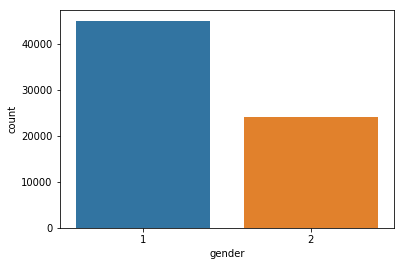

In [25]:
sns.countplot(data=train , x = 'gender')

* one is women and two is men 

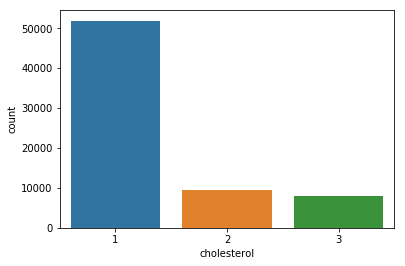

In [27]:
sns.countplot(data=train , x='cholesterol')

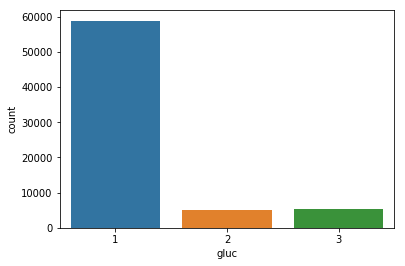

In [28]:

sns.countplot(data=train , x='gluc') 

* From above we can observe that 1 is in Normal case and 2 is in above normal case ,3 is in well above normal case .
* Here i is more in the sense most of the people's are in normal case .

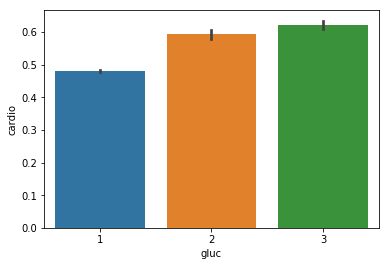

In [30]:

sns.barplot(x='gluc',y='cardio',data=train)

--> in above graph we can observe that the people having normal glucose level is less tend to get cardio disease

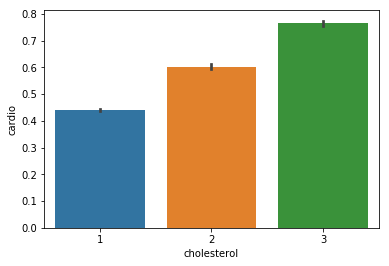

In [31]:
sns.barplot(x='cholesterol',y='cardio',data=train)

* In above graph we can observe that the  people having normal cholesterol level is less tend to get cardio disease.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


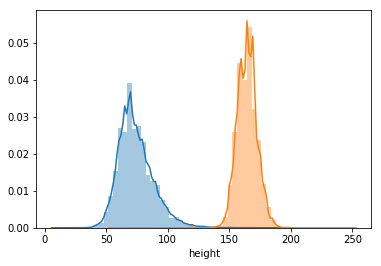

In [32]:
print(sns.distplot(train.weight,))
print(sns.distplot(train.height))

Both height and weight are normally distributed curve as both curve are bell curve

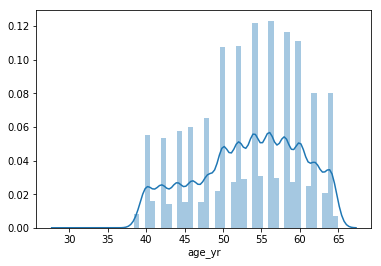

In [34]:

sns.distplot(train.age_yr)

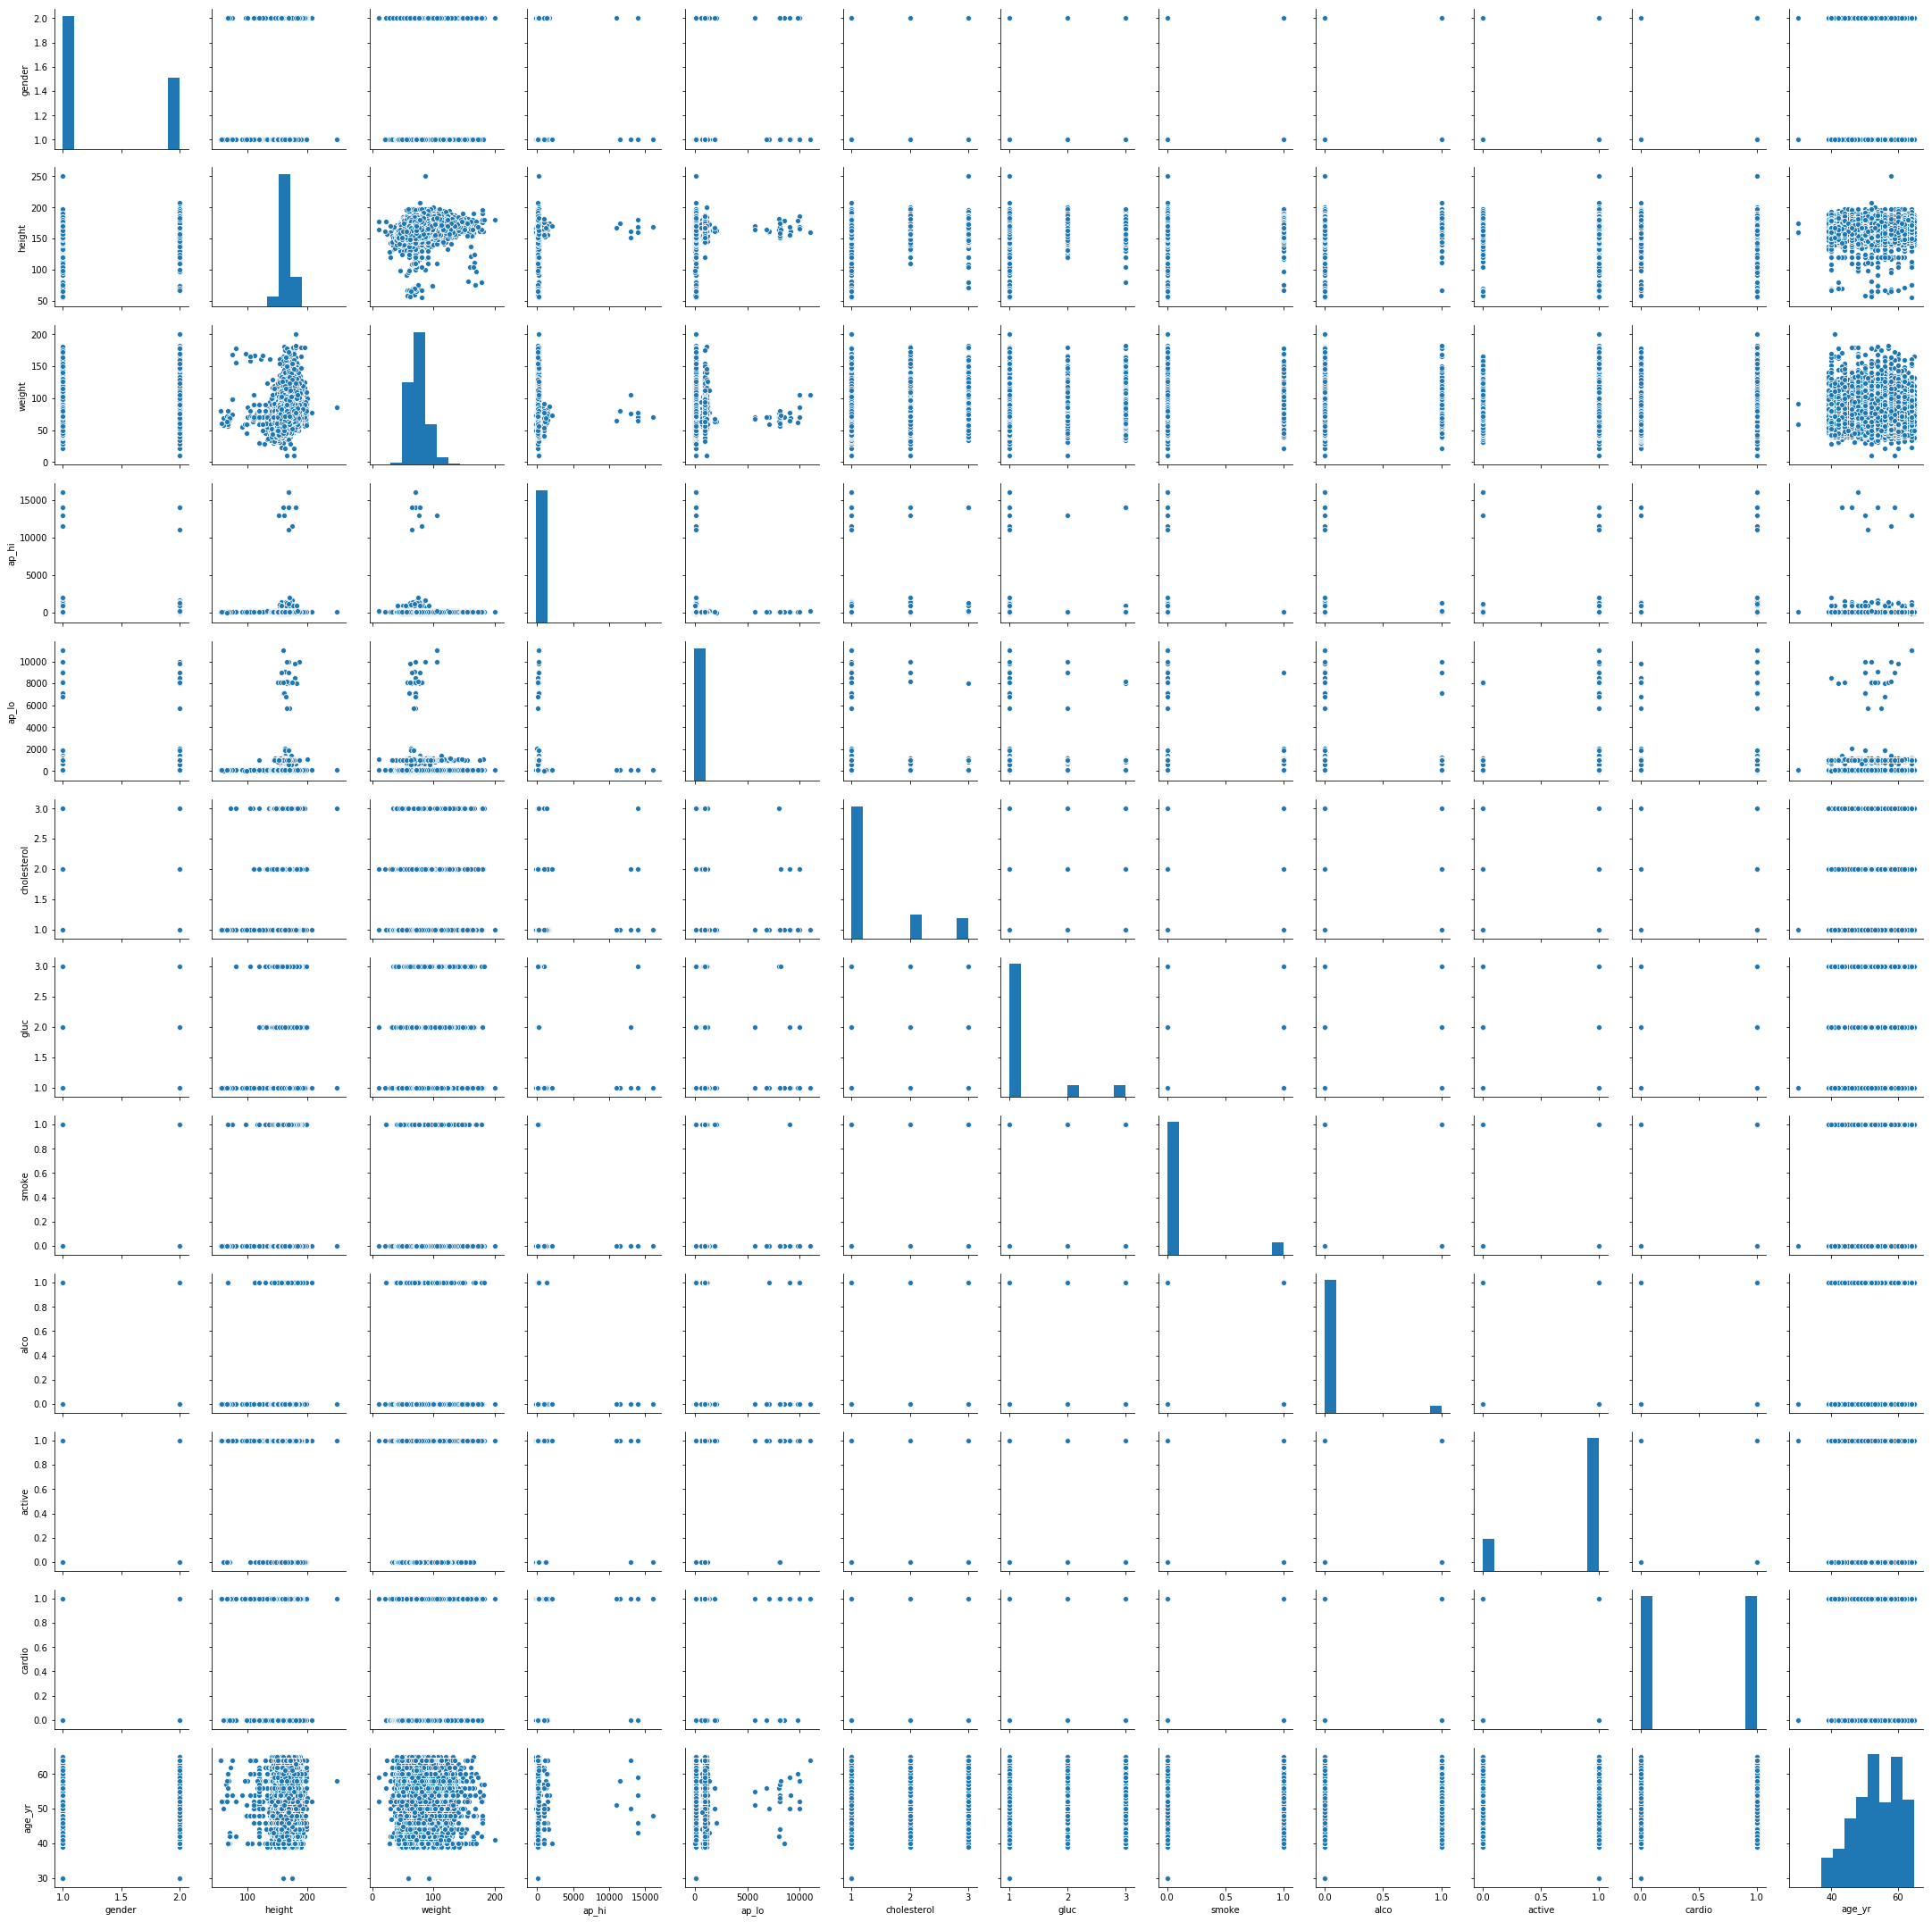

In [35]:

print(sns.pairplot(train))

### Standardize the data frame

In [21]:
# Standardize the dataframe
stdcols = ["age_yr","height","weight","ap_hi","ap_lo"]
nrmcols=["gender","gluc","alco","active"]

new_columns_1=["age_yr","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","cardio"]


stddf = train.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))


new_columns_2 = new_columns_1[:10] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["cardio"]
Xall = stddf[new_columns_2[:10]].values


### Creating Model

### ------------->Logistic Regression

In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lasso = False

nfeatures = len(stddf.columns)
if lasso:           # lasso regularization
    penalty = "l1"
    cval    = 1.0
    alpha   = [1.0]*nfeatures
else:               # no regularization
    penalty = "l1"
    cval    = 1000.0
    alpha   = 0.0

model=LogisticRegression(fit_intercept=True,C=1, penalty='l1', solver='liblinear')
print(model)
lrfit = model.fit(Xall,yall)
print('\nLogisticRegression score on full data set: %f\n' % lrfit.score(Xall,yall))
ypred = model.predict(Xall)
print ('\nClassification report on full data set:')
print(metrics.classification_report(yall,ypred))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(yall,ypred))
print ('\nLogisticRegression coefficients:')
coeff = model.coef_.tolist()[0]
for index in range(len(coeff)):
    print ('%s : %8.5f' % (new_columns_2[index+1].rjust(9),coeff[index]))
print( 'Intercept : %f' %model.intercept_)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

LogisticRegression score on full data set: 0.721158


Classification report on full data set:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     34679
           1       0.74      0.68      0.71     34622

    accuracy                           0.72     69301
   macro avg       0.72      0.72      0.72     69301
weighted avg       0.72      0.72      0.72     69301


Confusion matrix:
[[26515  8164]
 [11160 23462]]

LogisticRegression coefficients:
   age_yr : -0.03966
   height : -0.17037
   weight :  0.36637
    ap_hi : -0.04457
    ap_lo :  0.22234
cholesterol :  6.07731
     gluc :  0.05592
    smoke :  0.52256
     alco : -0.23882
   active : -0.12234
   cardio : -0.16661
Intercept : -0.596705
